In [2]:
import numpy as np
import datasets
import matplotlib.pyplot as plt

In [3]:
dataset = datasets.load_dataset("conll2003", trust_remote_code=True)

c:\Users\trewe\miniconda3\envs\bachelor_thesis\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\trewe\.cache\huggingface\hub\datasets--conll2003. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating test split: 100%|██████████| 3453/3453 [00:01<00:00, 3335.47 examples/s]


In [5]:
print(dataset['train'][40])

{'id': '40', 'tokens': ['Consultations', 'should', 'be', 'held', 'to', 'set', 'the', 'time', 'and', 'format', 'of', 'the', 'talks', ',', 'the', 'official', 'Xinhua', 'news', 'agency', 'quoted', 'Tang', 'Shubei', ',', 'executive', 'vice', 'chairman', 'of', 'the', 'Association', 'for', 'Relations', 'Across', 'the', 'Taiwan', 'Straits', ',', 'as', 'saying', 'late', 'on', 'Wednesday', '.'], 'pos_tags': [24, 20, 37, 40, 35, 37, 12, 21, 10, 21, 15, 12, 24, 6, 12, 21, 22, 21, 21, 40, 22, 22, 6, 16, 21, 21, 15, 12, 22, 15, 22, 15, 12, 22, 22, 6, 15, 39, 30, 30, 22, 7], 'chunk_tags': [11, 21, 22, 22, 21, 22, 11, 12, 12, 12, 13, 11, 12, 0, 11, 12, 12, 12, 12, 21, 11, 12, 0, 11, 12, 12, 13, 11, 12, 13, 11, 13, 11, 12, 12, 0, 13, 21, 11, 3, 11, 0], 'ner_tags': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0]}


In [1]:
len_train = len(dataset['train']['tokens'])
len_val = len(dataset['validation']['tokens'])
len_test = len(dataset['test']['tokens'])
len_dataset = len_train + len_val + len_test

print("Length of total dataset:", len_dataset)
print("Length of traindata:", len_train)
print("Length of valdata:", len_val)
print("Length of testdata:", len_test)

NameError: name 'dataset' is not defined

In [54]:
def contains_annotations(sentence: list) -> None:
    has_anno = False
    for char in sentence:
        if char != 0:
            has_anno = True
    return has_anno

train_tags = dataset['train']['ner_tags']
val_tags = dataset['validation']['ner_tags']
test_tags = dataset['test']['ner_tags']

neg_samples_train = [sentence for sentence in train_tags if contains_annotations(sentence) == False]
neg_samples_val = [sentence for sentence in val_tags if contains_annotations(sentence) == False]
neg_samples_test = [sentence for sentence in test_tags if contains_annotations(sentence) == False]

len_neg_samples = len(neg_samples_train) + len(neg_samples_test) + len(neg_samples_val)

print(f"Size of train samples: {len(neg_samples_train)}")
print(f"Size of validation samples: {len(neg_samples_val)}")
print(f"Size of test samples: {len(neg_samples_test)}")
print(f"Size of negative samples: {len_neg_samples}")


Size of train samples: 2909
Size of validation samples: 645
Size of test samples: 697
Size of negative samples: 4251


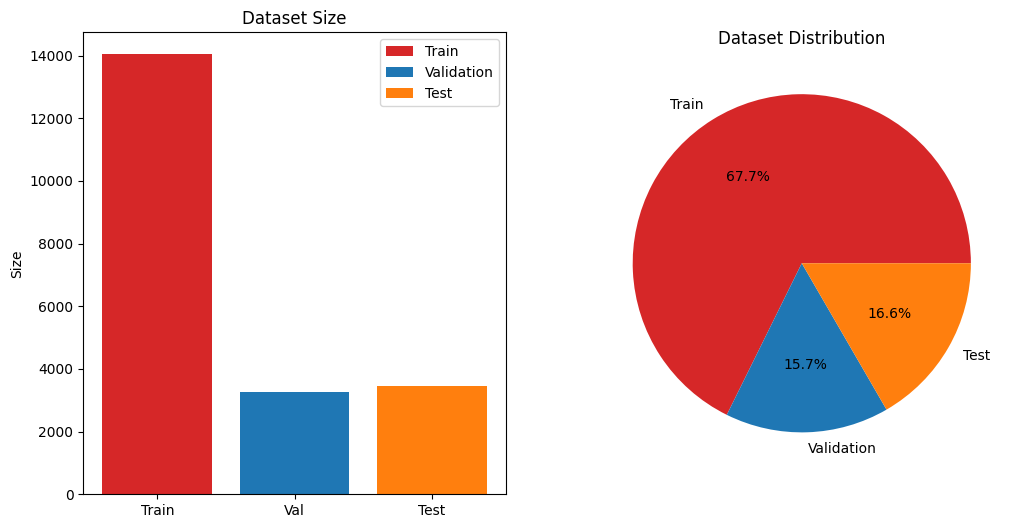

In [49]:
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(12, 6))

x_axis = ['Train', 'Val', 'Test']
y_axis = [len_train, len_val, len_test]
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']
bar_labels = ['Train', 'Validation', 'Test']

# Correct usage of bar function
ax1.bar(x_axis, y_axis, color=bar_colors, label=bar_labels)
ax1.set_ylabel("Size")
ax1.set_title("Dataset Size")
ax1.legend()

pie_labels = ['Train', 'Validation', 'Test']
pie_sizes = [len_train/len_dataset, len_val/len_dataset, len_test/len_dataset]
pie_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax2.pie(pie_sizes, labels=pie_labels, colors=pie_colors, autopct='%1.1f%%')
ax2.set_title("Dataset Distribution")

plt.show()

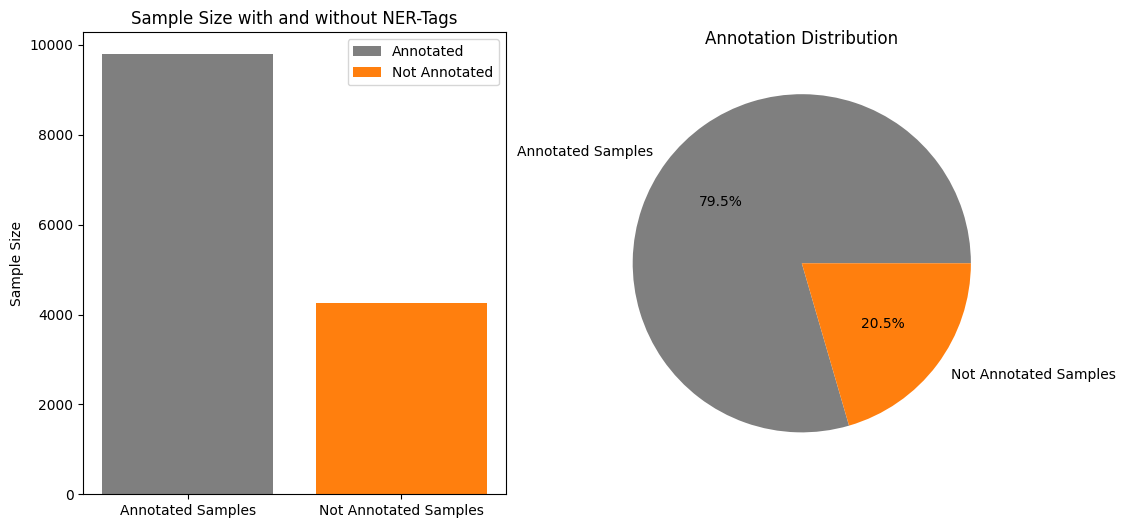

In [55]:
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(12, 6))

x_axis = ['Annotated Samples', 'Not Annotated Samples']
y_axis = [len(train_tags) - len_neg_samples, len_neg_samples]
bar_colors = ['tab:gray', 'tab:orange']
bar_labels = ['Annotated', 'Not Annotated']

# Correct usage of bar function
ax1.bar(x_axis, y_axis, color=bar_colors, label=bar_labels)
ax1.set_ylabel("Sample Size")
ax1.set_title("Sample Size with and without NER-Tags")
ax1.legend()

pie_labels = ['Annotated Samples', 'Not Annotated Samples']
pie_sizes = [(len_dataset - len_neg_samples)/len_dataset, len_neg_samples/len_dataset]
pie_colors = ['tab:gray', 'tab:orange']

ax2.pie(pie_sizes, labels=pie_labels, colors=pie_colors, autopct='%1.1f%%')
ax2.set_title("Annotation Distribution")

plt.show()